In [1]:
#http://cs231n.github.io/classification/
import random
import numpy as np
from data_utils import load_CIFAR10
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [3]:
# Load the raw CIFAR-10 data.
cifar10_dir = '/home/refaay/Work/Assignment1/cifar-10-batches-py/'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

x10k_train = X_train[:]
y10k_train = y_train[:]
count = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#Refaay
x = 0 # for 10 k
y = 0 # for 50 k
while x < 10000:
    y = y + 1
    #x = x + 1
    if count[y_train[y]] < 1000:
        #print(x)
        count[y_train[y]] = count[y_train[y]] + 1
        x10k_train[x]=X_train[y]
        y10k_train[x]=y_train[y]
        x = x + 1

In [4]:
# 3 crossfolds
exp1x = x10k_train[0:3334]
exp1y = y10k_train[0:3334]
#exp1x = np.copy(x10k_train[0:3333])
#exp1y = np.copy(y10k_train[0:3333])

exp2x = x10k_train[3334:6667]
exp2y = y10k_train[3334:6667]

exp3x = x10k_train[6667:10000]
exp3y = y10k_train[6667:10000]


# As a sanity check, we print out the size of the training and test data.
print ('Training data shape: ', X_train.shape)
print ('Training labels shape: ', y_train.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', y_test.shape)
print ('Training 10 k data shape: ', x10k_train.shape)
print ('Training 10 k labels shape: ', y10k_train.shape)
print(count)
print ('exp1 data shape: ', exp1x.shape)
print ('exp1 labels shape: ', exp1y.shape)
print ('exp2 data shape: ', exp2x.shape)
print ('exp2 labels shape: ', exp2y.shape)
print ('exp3 data shape: ', exp3x.shape)
print ('exp3 labels shape: ', exp3y.shape)

#count in each part
count2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
x = 0 
while x < 3334:
    count2[exp1y[x]] = count2[exp1y[x]] + 1
    x = x + 1
print(count2)
count3 = count2
print(count3)
count2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
x = 0 
while x < 3333:
    count2[exp2y[x]] = count2[exp2y[x]] + 1
    x = x + 1
print(count2)
count3 = np.add(count3,count2)
print(count3)
count2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
x = 0 
while x < 3333:
    count2[exp3y[x]] = count2[exp3y[x]] + 1
    x = x + 1
print(count2)
count3 = np.add(count3,count2)
print(count3)

('Training data shape: ', (50000, 32, 32, 3))
('Training labels shape: ', (50000,))
('Test data shape: ', (10000, 32, 32, 3))
('Test labels shape: ', (10000,))
('Training 10 k data shape: ', (50000, 32, 32, 3))
('Training 10 k labels shape: ', (50000,))
[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
('exp1 data shape: ', (3334, 32, 32, 3))
('exp1 labels shape: ', (3334,))
('exp2 data shape: ', (3333, 32, 32, 3))
('exp2 labels shape: ', (3333,))
('exp3 data shape: ', (3333, 32, 32, 3))
('exp3 labels shape: ', (3333,))
[333, 312, 355, 320, 343, 324, 342, 325, 343, 337]
[333, 312, 355, 320, 343, 324, 342, 325, 343, 337]
[337, 301, 334, 338, 348, 321, 345, 336, 330, 343]
[670 613 689 658 691 645 687 661 673 680]
[330, 387, 311, 342, 309, 355, 313, 339, 327, 320]
[1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


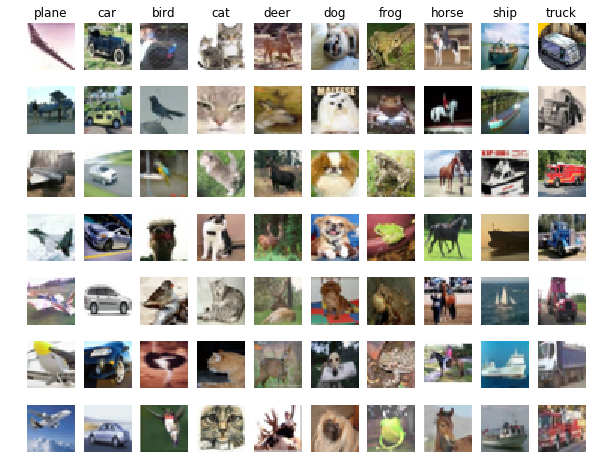

In [5]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [6]:
# Subsample the data for more efficient code execution in this exercise
#num_training = 6666
#mask = range(num_training)
#X_train = X_train[mask]
#y_train = y_train[mask] 

#num_test = 5000
#mask = range(num_test)
#X_test = X_test[mask]
#y_test = y_test[mask]

#EXP 3 -> change
X_train = np.concatenate((exp1x,exp2x, exp3x), axis=0) #change
y_train = np.concatenate((exp1y,exp2y, exp3y), axis=0) #change
#X_val = exp3x #change
#y_val = exp3y #change
print ('X_train data shape: ', X_train.shape)
print ('y_train labels shape: ', y_train.shape)
#print ('X_val data shape: ', X_val.shape)
#print ('y_val labels shape: ', y_val.shape)


('X_train data shape: ', (10000, 32, 32, 3))
('y_train labels shape: ', (10000,))


In [7]:
# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
#X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print (X_train.shape, X_test.shape)

((10000, 3072), (10000, 3072))


In [8]:
import NearestNeighbor as NN
# Create a NN classifier instance and train it with training data
classifier = NN.NearestNeighbor()
classifier.train(X_train, y_train)

In [9]:
# Predict the labels of testing data
y_test_pred = classifier.predict(X_test, 'L2', 18) # should use max k

In [26]:
# Compute and print the fraction of correctly predicted examples
num_correct = []
#print(y_test_pred[0])
for o in range(0, 10):
    num_correct.append(np.sum((y_test_pred == y_test) & (y_test == o)))
    #num_correct.append(np.sum(y_test == o))
    #num_correct.append(np.sum(y_test_pred == o))
print(num_correct)
print('CCRn:')
for o in range(0, 10):
    print('Class %d = %f' % (o+1, num_correct[o]/1000.0))
accuracy = float(np.sum(num_correct)) / 10000
print ('Got %d / %d correct => average correct accuracy: %f' % (np.sum(num_correct), 10000, accuracy))

num_correct2 = np.sum(y_test_pred == y_test)# Compute and print the fraction of correctly predicted examples
accuracy2 = float(num_correct2) / 10000
print ('Got %d / %d correct => accuracy2: %f' % (num_correct2, 10000, accuracy2))

[535, 70, 438, 89, 493, 165, 289, 142, 664, 107]
CCRn:
Class 1 = 0.535000
Class 2 = 0.070000
Class 3 = 0.438000
Class 4 = 0.089000
Class 5 = 0.493000
Class 6 = 0.165000
Class 7 = 0.289000
Class 8 = 0.142000
Class 9 = 0.664000
Class 10 = 0.107000
Got 2992 / 10000 correct => average correct accuracy: 0.299200
Got 2992 / 10000 correct => accuracy2: 0.299200


In [27]:
# Predict the labels of testing data
y_test_pred = classifier.predict(X_test, 'L2', 19) # should use max k



In [28]:
# Compute and print the fraction of correctly predicted examples
num_correct = []
#print(y_test_pred[0])
for o in range(0, 10):
    num_correct.append(np.sum((y_test_pred == y_test) & (y_test == o)))
    #num_correct.append(np.sum(y_test == o))
    #num_correct.append(np.sum(y_test_pred == o))
print(num_correct)
print('CCRn:')
for o in range(0, 10):
    print('Class %d = %f' % (o+1, num_correct[o]/1000.0))
accuracy = float(np.sum(num_correct)) / 10000
print ('Got %d / %d correct => average correct accuracy: %f' % (np.sum(num_correct), 10000, accuracy))

num_correct2 = np.sum(y_test_pred == y_test)# Compute and print the fraction of correctly predicted examples
accuracy2 = float(num_correct2) / 10000
print ('Got %d / %d correct => accuracy2: %f' % (num_correct2, 10000, accuracy2))

[539, 64, 438, 88, 486, 160, 283, 145, 659, 109]
CCRn:
Class 1 = 0.539000
Class 2 = 0.064000
Class 3 = 0.438000
Class 4 = 0.088000
Class 5 = 0.486000
Class 6 = 0.160000
Class 7 = 0.283000
Class 8 = 0.145000
Class 9 = 0.659000
Class 10 = 0.109000
Got 2971 / 10000 correct => average correct accuracy: 0.297100
Got 2971 / 10000 correct => accuracy2: 0.297100


In [3]:
print('max k = 18, therefore average correct classification rate (ACCR) = 0.299200 (calculated above)')

max k = 18, therefore average correct classification rate (ACCR) = 0.299200 (calculated above)
